# Unsupervised Learning

In [431]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [432]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv', index_col='playerShort')
df.sample(10)

,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
playerShort,,,,,,,,,,,,,,,,,,,,,
rafidine-abdullah,Rafidine Abdullah,Olympique Marseille,France,15.01.1994,179.0,75.0,NaN,1,0,0,...,0.75,126,7,FRA,0.334684,2882.0,0.000151,0.336101,3011.0,0.000586
david-fox,David Fox,Norwich City,England,13.12.1983,175.0,77.0,Center Midfielder,2,1,0,...,NaN,1614,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
adam-hlousek,Adam Hloušek,1. FC Nürnberg,Germany,20.12.1988,188.0,76.0,Left Midfielder,6,3,2,...,0.00,1646,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
sascha-moelders,Sascha Mölders,FC Augsburg,Germany,20.03.1985,185.0,79.0,Center Forward,5,0,1,...,0.00,329,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
jussi-jaeaeskelaeinen,Jussi Jääskeläinen,West Ham United,England,17.04.1975,193.0,80.0,Goalkeeper,3,1,0,...,0.00,2809,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
lucas-leiva,Lucas Leiva,Liverpool FC,England,09.01.1987,179.0,74.0,Center Midfielder,13,9,1,...,0.25,77,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
kevin-olimpa,Kevin Olimpa,Girondins Bordeaux,France,10.03.1988,186.0,81.0,NaN,1,1,0,...,0.50,2004,65,ISR,0.379424,925.0,0.000464,0.559375,960.0,0.001927
robert-mak,Róbert Mak,1. FC Nürnberg,Germany,08.03.1991,179.0,75.0,Right Winger,10,2,4,...,0.25,2902,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225
ansotegi,Ansotegi,Real Sociedad,Spain,13.07.1982,192.0,84.0,Center Back,1,1,0,...,0.25,588,102,SVN,0.273530,303.0,0.001426,0.429907,321.0,0.006084


In [433]:
# Remove columns with no rating
df = df.dropna(subset=['rater1', 'rater2'])
df['target'] = (df.rater1 + df.rater2)/2

In [434]:
sdf = df.reset_index().groupby('playerShort')

In [435]:
feature_function_mapper = {
    'height': np.average,
    'weight': np.average,
    'victories': np.sum,
    'ties': np.sum,
    'defeats': np.sum,
    'goals': np.sum,
    'yellowCards': np.sum,
    'yellowReds': np.sum,
    'redCards': np.sum,
    'target': np.average,
    'meanIAT': np.average,
    'nIAT': np.average,
    'seIAT': lambda x: np.sqrt(np.average(np.square(x))),
    'meanExp': np.average,
    'nExp': np.average,
    'seExp': lambda x: np.sqrt(np.average(np.square(x))),
} # meanIAT	nIAT	seIAT	meanExp	nExp	seExp

sdf_agg = sdf.agg(feature_function_mapper)
sdf_agg

,goals,ties,height,victories,nIAT,yellowCards,meanExp,weight,redCards,seExp,yellowReds,target,meanIAT,seIAT,nExp,defeats
playerShort,,,,,,,,,,,,,,,,
aaron-hughes,9,179,182.0,247,19710.156627,19,0.494575,71.0,0,0.027536,0,0.125,0.346459,0.003315,20637.277108,228
aaron-hunt,62,73,183.0,141,26104.292929,42,0.449220,73.0,1,0.002506,0,0.125,0.348818,0.000543,26864.454545,122
aaron-lennon,31,97,165.0,200,21234.861386,11,0.491482,63.0,0,0.008914,0,0.250,0.345893,0.001268,22238.742574,115
aaron-ramsey,39,42,178.0,150,38285.826923,31,0.514693,76.0,1,0.104541,0,0.000,0.346821,0.028116,39719.980769,68
abdelhamid-el-kaoutari,1,40,180.0,41,2832.351351,8,0.335587,73.0,2,0.023426,4,0.250,0.331600,0.006309,2953.837838,43
abdou-traore_2,3,23,180.0,41,4523.666667,11,0.296562,74.0,0,0.029404,1,0.750,0.320079,0.012160,4741.404762,33
abdoulaye-diallo_2,0,8,189.0,8,2646.700000,0,0.400818,80.0,0,0.001499,0,0.875,0.341625,0.000353,2762.500000,8
abdoulaye-keita_2,0,1,188.0,0,1728.000000,0,0.417225,83.0,0,0.002139,0,0.875,0.355406,0.000516,1808.500000,2
abdoulwhaid-sissoko,3,25,180.0,34,2470.196429,21,0.429630,68.0,2,0.000771,0,1.000,0.348178,0.000184,2593.214286,62


In [436]:
features = ['meanExp', 'meanIAT', 'seExp', 'seIAT']
X_unsup = sdf_agg[features]

#X_unsup = sdf_agg.copy()

X_unsup.sample(10)

,meanExp,meanIAT,seExp,seIAT
playerShort,,,,
maicon,NaN,NaN,NaN,NaN
juanmi_4,0.599027,0.368496,0.002783,0.000606
zubikarai,0.591902,0.368884,0.000987,0.000226
alvaro_10,0.531156,0.355329,0.002849,0.000540
emanuel-herrera,0.543169,0.350943,0.011880,0.002007
florian-raspentino,0.375656,0.338033,0.000721,0.000170
alexander-hien,0.335967,0.336628,0.000225,0.000055
anatoliy-tymoshchuk,0.636972,0.361238,0.009372,0.001503
adrian_7,0.588297,0.369894,0.001002,0.000229


In [437]:
X_unsup.fillna(X_unsup.mean(axis=0), inplace=True).head()

C:\Users\Ismail\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,meanExp,meanIAT,seExp,seIAT
playerShort,,,,
aaron-hughes,0.494575,0.346459,0.027536,0.003315
aaron-hunt,0.449220,0.348818,0.002506,0.000543
aaron-lennon,0.491482,0.345893,0.008914,0.001268
aaron-ramsey,0.514693,0.346821,0.104541,0.028116
abdelhamid-el-kaoutari,0.335587,0.331600,0.023426,0.006309


In [438]:
km = KMeans(n_clusters=2).fit(X_unsup)

In [439]:
km.predict(X_unsup)

array([1, 0, 1, ..., 0, 1, 1])

In [440]:
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_unsup, km.labels_, metric='euclidean'))

Silhouette Coefficient: 0.567


In [441]:
km.labels_

array([1, 0, 1, ..., 0, 1, 1])

In [442]:
km.cluster_centers_

array([[ 0.40947052,  0.34115116,  0.00811356,  0.00179149],
       [ 0.55994343,  0.36152791,  0.0084692 ,  0.00177226]])

In [443]:
X_unsup['K'] = km.labels_
X_unsup['target']=sdf_agg['target']

C:\Users\Ismail\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Ismail\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [444]:
X_unsup.head()

,meanExp,meanIAT,seExp,seIAT,K,target
playerShort,,,,,,
aaron-hughes,0.494575,0.346459,0.027536,0.003315,1,0.125
aaron-hunt,0.449220,0.348818,0.002506,0.000543,0,0.125
aaron-lennon,0.491482,0.345893,0.008914,0.001268,1,0.250
aaron-ramsey,0.514693,0.346821,0.104541,0.028116,1,0.000
abdelhamid-el-kaoutari,0.335587,0.331600,0.023426,0.006309,0,0.250


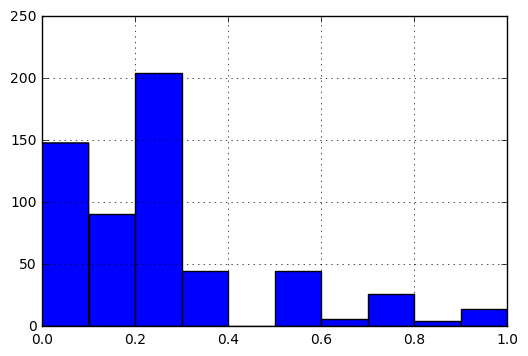

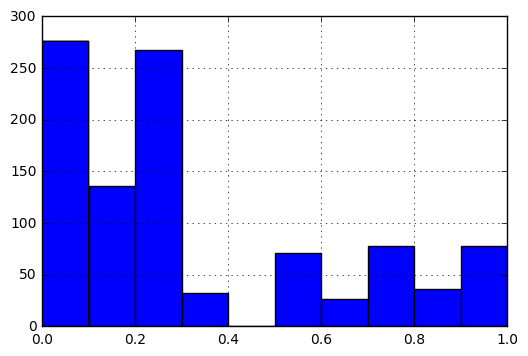

In [445]:
X_unsup[X_unsup.K == 1].target.hist()
plt.show()
X_unsup[X_unsup.K == 0].target.hist()
plt.show()

In [446]:
df1 = X_unsup[X_unsup.target <= 0.5]
df2 = df1[df1.K == 0]
white_in_clust0 = len(df2)
clust0_size = len(X_unsup[X_unsup.K == 0])
white_in_clust0 / clust0_size

0.781437125748503

In [447]:
df3 = X_unsup[X_unsup.target > 0.5]
df4 = df3[df3.K == 1]
white_in_clust1 = len(df4)
clust1_size = len(X_unsup[X_unsup.K == 1])
white_in_clust1 / clust1_size

0.08576329331046312

# Trying all possible combinations of features

In [448]:
def compute_white_proportions(table):
    df1 = table[table.target <= 0.5]
    df2 = df1[df1.K == 0]
    white_in_clust0 = len(df2)
    clust0_size = len(table[table.K == 0])
    prop0 = white_in_clust0 / clust0_size
    
    df3 = table[table.target > 0.5]
    df4 = df3[df3.K == 1]
    white_in_clust1 = len(df4)
    clust1_size = len(table[table.K == 1])
    prop1 = white_in_clust1 / clust1_size
    
    return np.abs(prop0- prop1)
    

In [449]:
def compute_kmeans(table):
    km = KMeans(n_clusters=2).fit(table)
    predictions = km.predict(table)
    table['K']=km.labels_
    score = silhouette_score(table, predictions, metric='euclidean')
    prop = compute_white_proportions(table)
    
    return score, prop

In [450]:
#found on http://python.jpvweb.com/mesrecettespython/doku.php?id=combinaisons
def combinliste(seq, k):
    p = []
    i, imax = 0, 2**len(seq)-1
    while i<=imax:
        s = []
        j, jmax = 0, len(seq)-1
        while j<=jmax:
            if (i>>j)&1==1:
                s.append(seq[j])
            j += 1
        if len(s)==k:
            p.append(s)
        i += 1 
    return p

In [451]:
def generate_feature_combinations(feats):
    combinations = []
    for i in range(len(feats)):
        combinations.append(combinliste(feats, i))
        
    return combinations

In [463]:
def compute_all_combinations(combinations, table) :
    X_comb = table.copy()
    X_comb.fillna(X_comb.mean(axis=0), inplace=True)
    silhouettes =[]
    clust_scores = []
    features = []
    for i in range(len(combinations)):
        print(i)
        for j in range(len(combinations[i])):
            #print("iteration {} , {}".format(i,j))
            #print(all_combinations[i][j])
            X_temp = X_comb.drop(combinations[i][j], axis=1)
            silhouette, clustering_score = compute_kmeans(X_temp)
            silhouettes.append(silhouette)
            clust_scores.append(clustering_score)
            features.append(combinations[i][j]) 
            
    kmean_stats = pd.DataFrame({'Silhouette': silhouettes,
                        'Clustering_scores' : clust_scores,
                        'Features' :features})
    kmean_stats.set_index('Clustering_scores', inplace=True)
    kmean_stats.sort_index(ascending=False, inplace=True)
    
    return kmean_stats

In [494]:
drop_feats = ['goals','ties','height','victories','weight','defeats']
all_combinations = generate_feature_combinations(drop_feats)

result = compute_all_combinations(all_combinations, sdf_agg)

0
1
2
3
4
5


In [511]:
result.head(10)

,Features,Silhouette
Clustering_scores,,
0.524893,"[goals, victories]",0.880108
0.524893,"[ties, height, weight, defeats]",0.880101
0.524893,[height],0.880096
0.524893,[victories],0.880105
0.524893,"[goals, victories, weight]",0.880108
0.524893,"[ties, height, weight]",0.880098
0.524893,"[height, weight]",0.880096
0.524893,"[goals, ties, weight]",0.880101
0.524893,"[goals, victories, weight, defeats]",0.880112


In [512]:
drop_feats = ['nIAT','meanExp','yellowCards','redCards','seExp','meanIAT','seIAT','nExp','yellowReds']
all_combinations = generate_feature_combinations(drop_feats)

In [515]:
noise_generating_features = result.max()['Features']
noiseless_table = sdf_agg.copy()
noiseless_table.drop(noise_generating_features, inplace=True, axis =1)
noiseless_table

,goals,ties,height,victories,nIAT,yellowCards,meanExp,redCards,seExp,yellowReds,target,meanIAT,seIAT,nExp
playerShort,,,,,,,,,,,,,,
aaron-hughes,9,179,182.0,247,19710.156627,19,0.494575,0,0.027536,0,0.125,0.346459,0.003315,20637.277108
aaron-hunt,62,73,183.0,141,26104.292929,42,0.449220,1,0.002506,0,0.125,0.348818,0.000543,26864.454545
aaron-lennon,31,97,165.0,200,21234.861386,11,0.491482,0,0.008914,0,0.250,0.345893,0.001268,22238.742574
aaron-ramsey,39,42,178.0,150,38285.826923,31,0.514693,1,0.104541,0,0.000,0.346821,0.028116,39719.980769
abdelhamid-el-kaoutari,1,40,180.0,41,2832.351351,8,0.335587,2,0.023426,4,0.250,0.331600,0.006309,2953.837838
abdou-traore_2,3,23,180.0,41,4523.666667,11,0.296562,0,0.029404,1,0.750,0.320079,0.012160,4741.404762
abdoulaye-diallo_2,0,8,189.0,8,2646.700000,0,0.400818,0,0.001499,0,0.875,0.341625,0.000353,2762.500000
abdoulaye-keita_2,0,1,188.0,0,1728.000000,0,0.417225,0,0.002139,0,0.875,0.355406,0.000516,1808.500000
abdoulwhaid-sissoko,3,25,180.0,34,2470.196429,21,0.429630,2,0.000771,0,1.000,0.348178,0.000184,2593.214286


In [516]:
result1 = compute_all_combinations(all_combinations, noiseless_table)

0
1
2
3
4
5
6
7
8


In [517]:
result1.head(10)

,Features,Silhouette
Clustering_scores,,
0.676906,"[nIAT, redCards, seExp, seIAT, nExp]",0.520297
0.676906,"[nIAT, redCards, seIAT, nExp]",0.520297
0.676736,"[nIAT, seIAT, nExp, yellowReds]",0.520563
0.676736,"[nIAT, meanExp, seExp, seIAT, nExp]",0.520453
0.675679,"[nIAT, redCards, nExp, yellowReds]",0.520126
0.675679,"[nIAT, meanExp, redCards, meanIAT, nExp]",0.520015
0.675679,"[nIAT, seExp, meanIAT, seIAT, nExp, yellowReds]",0.520030
0.675679,"[nIAT, seExp, seIAT, nExp]",0.519919
0.675679,"[nIAT, meanExp, seExp, meanIAT, nExp]",0.519920
